Na podstwie ostatnich 5 przewidzieć kolejną jedna -- wejsscie to deltta t i zmiana kursu



Dane zrobic w fromie 5 danych i wynik , potemm je poshuflowac
wyrzucic zmiany dluzsze niz dzien
mozna zsporbowac dane gdzie nic sie nie zmienilo tez wyrzucic 

# TO DO:

1. zmienic close na cours change w prepare_day DONE
2. zamineic df na numpy array DONE
3. przetestowac wyjatek w prepare_day
4. podzielic miesiace na grupy 6,1,3,1

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
path='../data/KGHM_clear.csv'
df=pd.read_pickle(path)

In [162]:
LEARN_SAMPLE_SIZE=5

In [176]:
df

,Date,Close,TimeDelta,CoursChange,day,month
0,2000-11-17 10:00:24,26.30,0.0,NaN,11/17/2000,11
1,2000-11-17 10:00:25,26.30,1.0,0.00,11/17/2000,11
2,2000-11-17 10:00:26,26.30,1.0,0.00,11/17/2000,11
3,2000-11-17 10:03:29,26.30,183.0,0.00,11/17/2000,11
4,2000-11-17 10:09:28,26.20,359.0,-0.10,11/17/2000,11
5,2000-11-17 10:11:10,26.30,102.0,0.10,11/17/2000,11
6,2000-11-17 10:14:19,26.30,189.0,0.00,11/17/2000,11
7,2000-11-17 10:14:29,26.30,10.0,0.00,11/17/2000,11
8,2000-11-17 10:24:10,26.30,581.0,0.00,11/17/2000,11
9,2000-11-17 10:29:42,26.30,332.0,0.00,11/17/2000,11


In [163]:
df.head()

,Date,Close,TimeDelta,CoursChange,day,month
0,2000-11-17 10:00:24,26.3,0.0,NaN,11/17/2000,11
1,2000-11-17 10:00:25,26.3,1.0,0.0,11/17/2000,11
2,2000-11-17 10:00:26,26.3,1.0,0.0,11/17/2000,11
3,2000-11-17 10:03:29,26.3,183.0,0.0,11/17/2000,11
4,2000-11-17 10:09:28,26.2,359.0,-0.1,11/17/2000,11


In [164]:
# df=df[:100000]

# Grupowanie po dniach

In [177]:
gb=df.groupby(df.day)

In [178]:
df_group_by_day_list=[gb.get_group(x).copy() for x in gb.groups]

In [179]:
for i in df_group_by_day_list:
    i.reset_index

In [181]:
df_group_by_day_list[0]

,Date,Close,TimeDelta,CoursChange,day,month
7122,2001-01-02 10:00:05,25.2,323402.0,-0.6,01/02/2001,13
7123,2001-01-02 10:00:08,25.2,3.0,0.0,01/02/2001,13
7124,2001-01-02 10:00:09,25.2,1.0,0.0,01/02/2001,13
7125,2001-01-02 10:00:10,25.2,1.0,0.0,01/02/2001,13
7126,2001-01-02 10:00:47,25.2,37.0,0.0,01/02/2001,13
7127,2001-01-02 10:03:56,25.2,189.0,0.0,01/02/2001,13
7128,2001-01-02 10:04:18,25.2,22.0,0.0,01/02/2001,13
7129,2001-01-02 10:06:35,25.1,137.0,-0.1,01/02/2001,13
7130,2001-01-02 10:06:40,25.1,5.0,0.0,01/02/2001,13
7131,2001-01-02 10:07:44,25.1,64.0,0.0,01/02/2001,13


# Dla każdego dnia możemy przeprowadzić osobne operacje

In [169]:
def prepare_day(df_group_by_day_list,learn_sample_size=5,predict_next=True):
    
    if predict_next:
        predict_n_steps_future=1
    else:
        predict_n_steps_future=0
        raise ValueError("Predicting long then next doesnt work yet") 
    for i,df_group in enumerate(df_group_by_day_list):
        #resetowanie indeksow
        
        
        #dodawanie wczesniejszych wartosci pomiarow
        for j in range(1,learn_sample_size):
            df_group_by_day_list[i]['CoursChange-'+str(j)]=df_group_by_day_list[i].loc[:,('CoursChange')].shift(j)
            df_group_by_day_list[i]['TimeDelta_-'+str(j)]=df_group_by_day_list[i].TimeDelta.shift(j)
        
        #tworzenie wynikow
        df_group_by_day_list[i].loc[:,('y')]=df_group_by_day_list[i].loc[:,('CoursChange')].shift(-predict_n_steps_future)
        df_group_by_day_list[i].drop(df_group_by_day_list[i].head(learn_sample_size).index,inplace=True)
        df_group_by_day_list[i].drop(df_group_by_day_list[i].tail(predict_n_steps_future).index,inplace=True)
        df_group_by_day_list[i].reset_index(inplace=True,drop=True)
        #         df_group_by_day_list[i].drop(df_group_by_day_list[i][df_group_by_day_list[i].TimeDelta>4000].index)
#     Next step -> delate outstandig values


In [170]:
prepare_day(df_group_by_day_list,learn_sample_size=LEARN_SAMPLE_SIZE)

In [171]:
df_group_by_day_list[0]

,Date,Close,TimeDelta,CoursChange,day,month,CoursChange-1,TimeDelta_-1,CoursChange-2,TimeDelta_-2,CoursChange-3,TimeDelta_-3,CoursChange-4,TimeDelta_-4,y
0,2001-01-02 10:03:56,25.2,189.0,0.0,01/02/2001,13,0.0,37.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
1,2001-01-02 10:04:18,25.2,22.0,0.0,01/02/2001,13,0.0,189.0,0.0,37.0,0.0,1.0,0.0,1.0,-0.1
2,2001-01-02 10:06:35,25.1,137.0,-0.1,01/02/2001,13,0.0,22.0,0.0,189.0,0.0,37.0,0.0,1.0,0.0
3,2001-01-02 10:06:40,25.1,5.0,0.0,01/02/2001,13,-0.1,137.0,0.0,22.0,0.0,189.0,0.0,37.0,0.0
4,2001-01-02 10:07:44,25.1,64.0,0.0,01/02/2001,13,0.0,5.0,-0.1,137.0,0.0,22.0,0.0,189.0,-0.1
5,2001-01-02 10:08:00,25.0,16.0,-0.1,01/02/2001,13,0.0,64.0,0.0,5.0,-0.1,137.0,0.0,22.0,0.0
6,2001-01-02 10:08:54,25.0,54.0,0.0,01/02/2001,13,-0.1,16.0,0.0,64.0,0.0,5.0,-0.1,137.0,0.2
7,2001-01-02 10:09:58,25.2,64.0,0.2,01/02/2001,13,0.0,54.0,-0.1,16.0,0.0,64.0,0.0,5.0,-0.2
8,2001-01-02 10:10:01,25.0,3.0,-0.2,01/02/2001,13,0.2,64.0,0.0,54.0,-0.1,16.0,0.0,64.0,0.0
9,2001-01-02 10:10:15,25.0,14.0,0.0,01/02/2001,13,-0.2,3.0,0.2,64.0,0.0,54.0,-0.1,16.0,0.0


In [172]:
df_merged=pd.concat(df_group_by_day_list, axis=0, ignore_index=True)

In [202]:
df_merged.month.min()

11

In [200]:
maximum=df_merged.month.max()
test=[]
train=[]
i=df_merged.month.min()
while i<(df_merged.month.max()+1):
    for j in range(i,i+6):
        train.append(j)
    i+=6
    i+=1
    for j in range(i,i+3):
        test.append(j)
    i+=3
    i+=1
    
    

In [104]:
# df_merged[df_merged[df_merged.TimeDelta>8000].index[0]-2:df_merged[df_merged.TimeDelta>8000].index[0]+2]

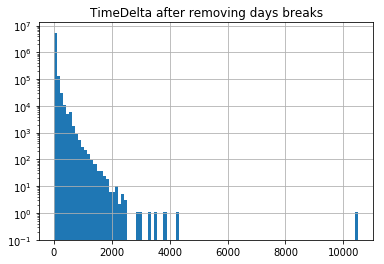

In [105]:
fig, ax = plt.subplots()
df_merged.TimeDelta.hist(ax=ax,bins=100, bottom=0.1)

# series.hist( bins=100, bottom=0.1)
ax.set_yscale('log')
ax.set_title('TimeDelta after removing days breaks')
plt.show()

# Prediction

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm
import numpy as np

In [107]:
df=df_merged

data_size=len(df)

In [108]:
df.tail()

,Date,Close,TimeDelta,CoursChange,day,CoursChange-1,TimeDelta_-1,CoursChange-2,TimeDelta_-2,CoursChange-3,TimeDelta_-3,CoursChange-4,TimeDelta_-4,y
5585984,2010-12-31 13:22:17,173.0,80.0,0.0,12/31/2010,0.0,13.0,0.0,20.0,0.0,22.0,1.4,607.0,0.0
5585985,2010-12-31 13:22:32,173.0,15.0,0.0,12/31/2010,0.0,80.0,0.0,13.0,0.0,20.0,0.0,22.0,0.0
5585986,2010-12-31 13:22:41,173.0,9.0,0.0,12/31/2010,0.0,15.0,0.0,80.0,0.0,13.0,0.0,20.0,0.0
5585987,2010-12-31 13:22:59,173.0,18.0,0.0,12/31/2010,0.0,9.0,0.0,15.0,0.0,80.0,0.0,13.0,0.0
5585988,2010-12-31 13:23:58,173.0,59.0,0.0,12/31/2010,0.0,18.0,0.0,9.0,0.0,15.0,0.0,80.0,0.0


In [109]:
[x for x in df.columns if 'Time' in x or 'Cours' in x]

['TimeDelta',
 'CoursChange',
 'CoursChange-1',
 'TimeDelta_-1',
 'CoursChange-2',
 'TimeDelta_-2',
 'CoursChange-3',
 'TimeDelta_-3',
 'CoursChange-4',
 'TimeDelta_-4']

In [110]:
X = np.array(df[[x for x in df.columns if 'Time' in x or 'Cours' in x]])


In [111]:
X.shape

(5585989, 10)

In [112]:
y =  np.array(df.y)

In [113]:
y.shape

(5585989,)

In [114]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

In [121]:
normalized_X = preprocessing.scale(X)
normalized_y = preprocessing.scale(y)
# normalized_X=X
# normalized_y=y

In [122]:
print(normalized_y.shape,normalized_X.shape)

(5585989,) (5585989, 10)


In [123]:
normalized_X

array([[ 3.40858948e+00, -3.34668655e-03, -3.35559314e-03, ...,
        -4.12422839e-01, -3.40249750e-03, -3.71817367e-01],
       [ 1.82800722e-02, -3.34668655e-03, -3.35559314e-03, ...,
        -4.12422839e-01, -3.40249750e-03, -4.13529997e-01],
       [ 2.35292427e+00, -1.12585958e+00, -3.35559314e-03, ...,
         3.34013849e-01, -3.40249750e-03, -4.13529997e-01],
       ...,
       [-2.45636229e-01, -3.34668655e-03, -3.35559314e-03, ...,
        -1.63610610e-01, -3.40249750e-03, -1.72600159e-02],
       [-6.29249434e-02, -3.34668655e-03, -3.35559314e-03, ...,
         1.22559101e+00, -3.40249750e-03, -1.63254219e-01],
       [ 7.69426467e-01, -3.34668655e-03, -3.35559314e-03, ...,
        -1.22141905e-01, -3.40249750e-03,  1.23411887e+00]])

In [124]:
y.shape

(5585989,)

In [125]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(normalized_X, normalized_y, test_size = 0.2, shuffle=False)

In [126]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.11292008060678538


In [61]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

NameError: name 'X_forecast' is not defined

In [ ]:
a=X_test[:-5]
print(a)
print(y_test[:-5])

In [ ]:
clf.predict(a)